<a href="https://colab.research.google.com/github/GabrielMarkss/GoogleColabBD/blob/main/ProjetoTAVBD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Importa a biblioteca pandas como pd
import pandas as pd

In [3]:
# Importe a biblioteca pyplot do submódulo matplotlib como plt.
import matplotlib.pyplot as plt

In [4]:
# Importa o código do Drive no ambiente do Colab.
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# Esse código lê um arquivo CSV chamado 'dataset-alzheimer.csv' usando pandas, com ';' como separador e codificação
# ISO 8859-1, e armazena em uma variável chamada 'dataset'.
dataset = pd.read_csv('dataset-BTC.csv', sep=';', encoding='iso-8859-1')
dataset

,Data,Abertura,Máxima,Mínima,Fechamento,Ajustes pós-fechamento,Volume
0,01/01/2024,42.280.234.375,441.754.375,422.149.765.625,4.416.733.203.125,4.416.733.203.125,18.426.978.443
1,02/01/2024,44.187.140.625,4.589.970.703.125,4.417.694.921.875,4.495.796.875,4.495.796.875,39.335.274.536
2,03/01/2024,449.616.015.625,455.032.421.875,4.081.353.515.625,4.284.817.578.125,4.284.817.578.125,46.342.323.118
3,04/01/2024,4.285.581.640.625,447.700.234.375,4.267.517.578.125,44.179.921.875,44.179.921.875,30.448.091.210
4,05/01/2024,4.419.298.046.875,4.435.328.515.625,4.278.471.875,4.416.269.140.625,4.416.269.140.625,32.336.029.347
...,...,...,...,...,...,...,...
107,17/04/2024,6.383.184.765.625,6.448.636.328.125,597.685.859.375,6.127.669.140.625,6.127.669.140.625,41.915.247.049
108,18/04/2024,6.127.531.640.625,641.256.875,6.083.348.046.875,6.351.275.390.625,6.351.275.390.625,36.006.307.335
109,19/04/2024,63510.75,6.548.159.765.625,59.651.390.625,638.435.703.125,638.435.703.125,49.920.425.401
110,20/04/2024,638.511.015.625,6.544.245.703.125,6.317.240.234.375,6.499.444.140.625,6.499.444.140.625,23.097.485.495


In [6]:
# remove os pontos dos valores da coluna 'Abertura' e os converte para float.
dataset['Abertura'] = dataset['Abertura'].str.replace('.', '').astype(float)

sum_volume = dataset['Abertura'].sum()
print("A soma do valor de abertura é:", sum_volume)

A soma do valor de abertura é: 217578518852900.0


In [7]:
min_volume = dataset['Abertura'].min()
print("O menor valor de abertura é:", min_volume)

O menor valor de abertura é: 716325.0


In [8]:
max_volume = dataset['Abertura'].max()
print("O maior valor de abertura é:", max_volume)

O maior valor de abertura é: 6499281640625.0


In [9]:
mean_volume = dataset['Abertura'].mean()
print("A média da abertura é:", mean_volume)

A média da abertura é: 1942665346900.8928


In [10]:
median_volume = dataset['Abertura'].median()
print("A mediana do valor de abertura é:", median_volume)

A mediana do valor de abertura é: 660377187500.0


In [11]:
std_volume = dataset ['Abertura'].std()
print("O Desvio Padrão do valor de abertura é:", std_volume)

O Desvio Padrão do valor de abertura é: 2338702997639.1816


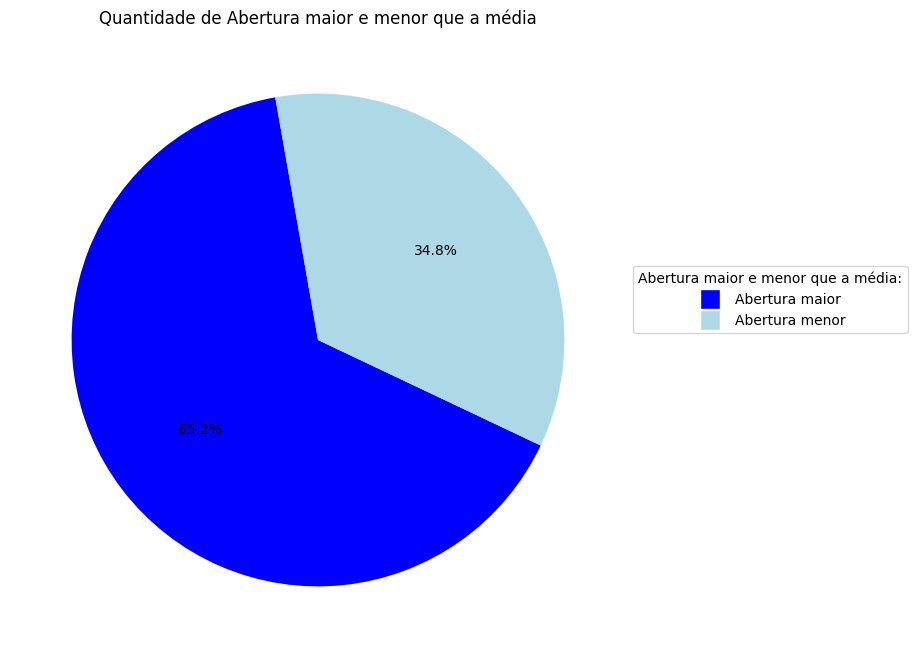

In [29]:
# Substitui os pontos por strings vazias, substituindo as vírgulas por pontos e convertendo os valores para o tipo 'float'
dataset['Abertura'] = dataset['Abertura'].str.replace('.', '').str.replace(',', '.').astype(float)

# Filtra o dataset para contar quantas 'Aberturas' são menores e maiores que um valor específico
aberturas_menores = dataset[dataset['Abertura'] < 1942665346900.8928]['Abertura'].count()
aberturas_maiores = dataset[dataset['Abertura'] >= 1942665346900.8928]['Abertura'].count()

cores = ['blue', 'lightblue'] # Define das cores

fig, ax = plt.subplots(figsize=(8, 8)) # Cria uma figura e um eixo para o gráfico com tamanho 8x8 polegadas

# Cria o gráfico com os valores 'aberturas_menores' e 'aberturas_maiores', define as cores das fatias,
# 'autopct' define o formato da porcentagem nas fatias, e 'startangle' define o ângulo inicial
wedges, texts, autotexts = ax.pie([aberturas_menores, aberturas_maiores], colors=cores, autopct='%1.1f%%', startangle=100)

legend_labels = ['Abertura maior', 'Abertura menor'] # Cria os rótulos da legenda para as fatias do gráfico
legend_patches = [plt.Line2D([0], [0], marker='s', color='w', markersize=15, markerfacecolor=cor) for cor in cores] # Adiciona os quadrados de cor e legendas
ax.legend(legend_patches, legend_labels, title="Abertura maior e menor que a média:", loc="lower left", bbox_to_anchor=(1, 0.5), ncol=1) # Cria o título dos rótulos
plt.title('Quantidade de Abertura maior e menor que a média') # Define um título
plt.show() # Mostra o gráfico

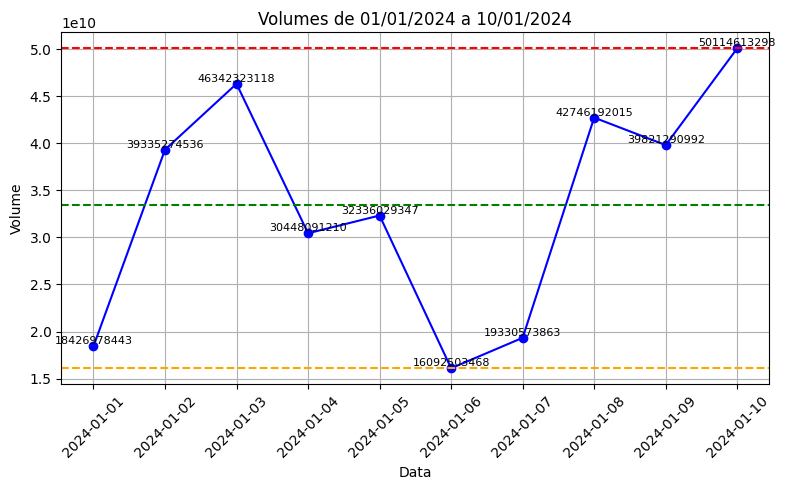

In [37]:
# Carrega o arquivo CSV chamado 'dataset-BTC.csv' usando o separador ; e a codificação 'ISO-8859-1'.
dataset = pd.read_csv('dataset-BTC.csv', sep=';', encoding='iso-8859-1')
# Convertendo a coluna 'Data' para o tipo datetime no formatado dia/mês/ano.
dataset['Data'] = pd.to_datetime(dataset['Data'], format='%d/%m/%Y')
# Removendo os pontos de separação da coluna 'Volume' e convertendo para float
dataset['Volume'] = dataset['Volume'].str.replace('.', '').astype(float)

# Filtrando o dataset para o intervalo de datas desejado (01/01/2024 a 10/01/2024)
dataset_grafico2 = dataset[(dataset['Data'] >= '2024-01-01') & (dataset['Data'] <= '2024-01-10')]
plt.figure(figsize=(8, 5)) # Cria uma figura e um eixo para o gráfico com tamanho 8x5 polegadas

# Plota os dados no gráfico, usando 'Data' no eixo x e 'Volume' no eixo y, define a cor da linha como azul e cada ponto será marcado com um círculo.
plt.plot(dataset_grafico2['Data'], dataset_grafico2['Volume'], color='blue', marker='o')

plt.title('Volumes de 01/01/2024 a 10/01/2024') # Define um título
plt.xlabel('Data') # Rótulo do eixo X
plt.ylabel('Volume')# Rótulo do eixo Y
plt.grid(True) # Adiciona uma grade ao gráfico que facilita a leitura dos dados.

# Calcula a média dos volumes no período filtrado.
media_volume = dataset_grafico2['Volume'].mean()

plt.axhline(y=dataset_grafico2['Volume'].max(), color='red', linestyle='--', label='Máximo') # Adiciona uma linha vermelha para máximo
plt.axhline(y=media_volume, color='green', linestyle='--', label='Média') # Adiciona uma linha verde linha para média
plt.axhline(y=dataset_grafico2['Volume'].min(), color='orange', linestyle='--', label='Mínimo') # Adiciona uma linha laranja para mínimo

# Adiciona o valor do volume como texto em cada ponto de um gráfico, com cor preta, tamanho de fonte 8, centralizado horizontalmente  (ha='center'),
# alinha na parte inferior verticalmente (va='bottom').
for index, row in dataset_grafico2.iterrows():
    plt.text(row['Data'], row['Volume'], str(int(row['Volume'])), color='black', fontsize=8, ha='center', va='bottom')

plt.xticks(rotation=45) # Rotaciona os rótulos do eixo x em 45 graus
plt.tight_layout() # Ajusta os elementos do gráfico para que se encaixem bem na figura, evitando sobreposição.
plt.show() # Mostra o gráfico

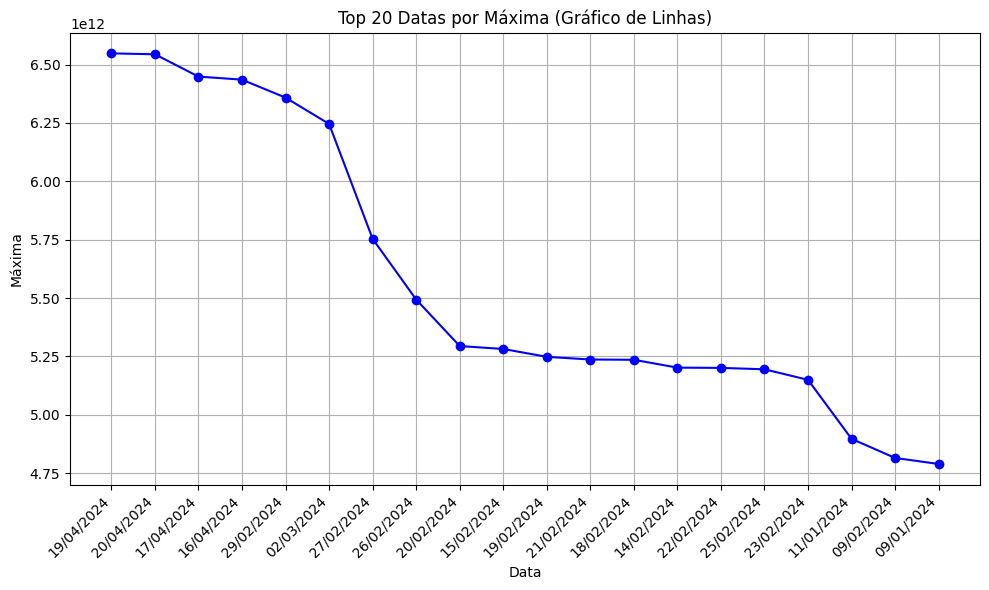

In [27]:
# Carrega o arquivo CSV chamado 'dataset-BTC.csv' usando o separador ; e a codificação 'ISO-8859-1'.
dataset = pd.read_csv('dataset-BTC.csv', sep=';', encoding='iso-8859-1')

# Removendo os pontos de separação da coluna 'Máxima' e 'Mínima'
dataset['Máxima'] = dataset['Máxima'].str.replace('.', '').astype(float)
dataset['Mínima'] = dataset['Mínima'].str.replace('.', '').astype(float)

# Agrupa os dados pelo valor da coluna 'Data' e calcula o valor máximo da coluna 'Máxima',
# depois reseta o indice do DataFrame resultante, para que Data volte a ser uma coluna e não um índice;
data_maxima = dataset.groupby('Data')['Máxima'].max().reset_index()

data_maxima = data_maxima.sort_values(by='Máxima', ascending=False) # Ordena os dados da coluna 'Máxima' em ordem decrescente
top_20_maxima = data_maxima.head(20) # Seleciona somente os 20 maiores valores
plt.figure(figsize=(10, 6)) # Cria uma figura e um eixo para o gráfico com tamanho 10x6 polegadas

# Plota um gráfico de linhas usando os dados das colunas 'Data' e 'Máxima'. Cada ponto de dado é marcado com um círculo ('o'),
# as linhas entre os pontos são sólidas ('-'), e a cor da linha é azul ('b').
plt.plot(top_20_maxima['Data'], top_20_maxima['Máxima'], marker='o', linestyle='-', color='b')

plt.title('Top 20 Datas por Máxima (Gráfico de Linhas)') # Adiciona um título
plt.xlabel('Data') # Rótulo do eixo X
plt.ylabel('Máxima') # Rótulo do eixo Y

plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X em 45 graus e alinha-os à direita para melhor legibilidade.
plt.grid(True) # Adiciona uma grade ao gráfico
plt.tight_layout() # Ajusta os elementos do gráfico para que se encaixem bem na figura, evitando sobreposição.
plt.show() # Exibe o gráfico

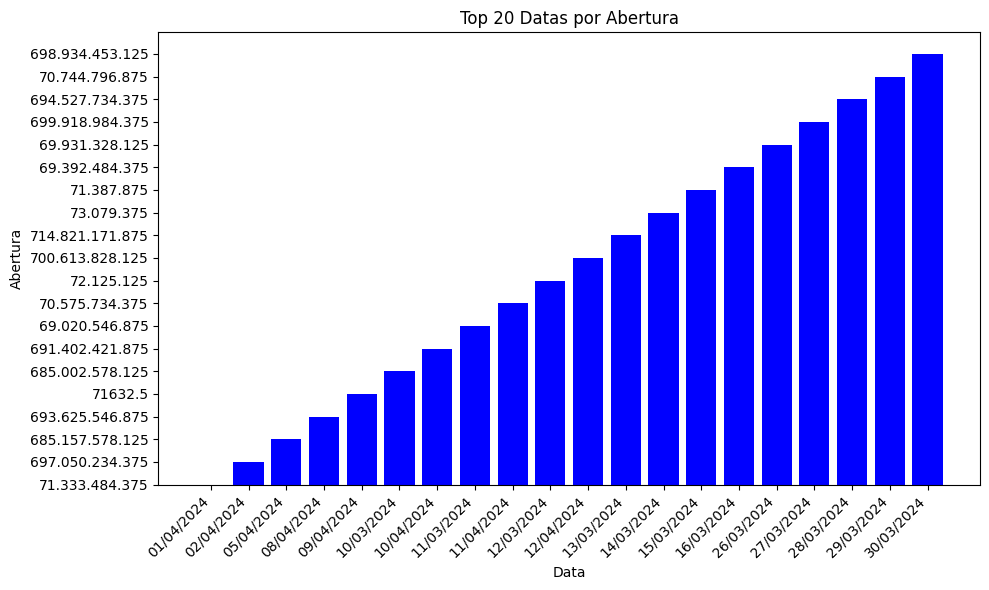

In [24]:
# Carrega o arquivo CSV chamado 'dataset-BTC.csv' usando o separador ; e a codificação 'ISO-8859-1'.
data_abertura = dataset.groupby('Data')['Abertura'].sum().reset_index()

# Ordenar os dados pela soma das aberturas em ordem decrescente
data_abertura = data_abertura.sort_values(by='Abertura', ascending=False)

# Selecionar os 20 maiores valores
top_20_aberturas = data_abertura.head(20)

# Reordenar os dados selecionados pela 'Data' para melhorar a visualização
top_20_aberturas = top_20_aberturas.sort_values(by='Data')

plt.figure(figsize=(10, 6)) # Cria uma figura e um eixo para o gráfico com tamanho 10x6 polegadas
plt.bar(top_20_aberturas['Data'], top_20_aberturas['Abertura'], color='blue') # Cria um gráfico de barras azuis com as datas no eixo X e os valores de abertura no eixo Y.
plt.title('Top 20 Datas por Abertura')  # Adiciona um título

plt.xlabel('Data') # Rótulo do eixo X
plt.ylabel('Abertura') # Rótulo do eixo Y

plt.xticks(rotation=45, ha='right') # Rotaciona os rótulos do eixo X em 45 graus e alinha-os à direita para melhor legibilidade.
plt.tight_layout() # Ajusta os elementos do gráfico para que se encaixem bem na figura, evitando sobreposição.
plt.show() # Mostra o gráfcio